**CNN - Basic convolutional neural networks**

Recommended reads: 
* https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050
* https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

**Convolutional neural network:**
![img 404](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)

CNN usually consists of a series of convolution + pooling layers, followed by fully connected layers

**Convolutions:** <br />
Definitions:
<img src="https://cdn-images-1.medium.com/max/1600/1*cTEp-IvCCUYPTT0QpE3Gjg@2x.png" alt="Drawing" style="width: 400px;"/>

**Input** - input image, usually a 3D array of RGB values. <br />
**Kernel** - filter, matrix operation that will be applied to transform input image <br />

Convolution - cell 1
<img src="https://cdn-images-1.medium.com/max/1600/1*ghaknijNGolaA3DpjvDxfQ@2x.png" alt="Drawing" style="width: 400px;"/>
Convolution - cell 2
<img src="https://cdn-images-1.medium.com/max/1600/1*oxOsZPfZFxgGZw2ycQnenw@2x.png" alt="Drawing" style="width: 400px;"/>


**Pooling:** <br />

<img src="https://cdn-images-1.medium.com/max/1600/1*ReZNSf_Yr7Q1nqegGirsMQ@2x.png" alt="Drawing" style="width: 400px;"/>

MaxPooling takes the maximum value from the selected cells. Main purpose is to downsample the input but keep the most important information


Demo showcase - let's start with the usual - sample photo of a cat!:

In [1]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# load an image from file
raw_image = load_img('./data/cnn_image/image_cat.jpeg', target_size=(224, 224))
plt.imshow(raw_image)

Using TensorFlow backend.


We are going to use a CNN that has already been trained for us and is publicly available - VGG16. It's a network consisting of 16 layers <a href="https://cdn-images-1.medium.com/max/1600/1*U8uoGoZDs8nwzQE3tOhfkw@2x.png">(see architecture)</a> and has already been pre-trained for us on <a href="http://www.image-net.org/"> Imagenet dataset </a>.

Due to it's popularity VGG16 is already included in some of the most popular ML frameworks - we will use the one  <a href="https://keras.io/applications/#vgg16">provided by Keras</a>.


In [2]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights = 'imagenet', input_shape=(224, 224, 3))

Now we can convert our image to array of values.

In [3]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions

image_arr = img_to_array(raw_image)
image_arr.shape

(224, 224, 3)

Due to API requirements, we need an arary of images, therefore we add 1 dimension

In [4]:
image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
image.shape

(1, 224, 224, 3)

Now we can run the prediction and see the output of our CNN network!

In [5]:
item = model.predict(image)
labels = decode_predictions(item)
print(labels)

[[('n02123394', 'Persian_cat', 0.9991867), ('n02127052', 'lynx', 0.0003814413), ('n02328150', 'Angora', 0.00016468475), ('n03958227', 'plastic_bag', 9.170757e-05), ('n03482405', 'hamper', 3.2461587e-05)]]


Usually it is advised to preprocess the image before feeding it into vgg16. Keras also provides us with functions for that. Let's see how our image would look like after preprocessing:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


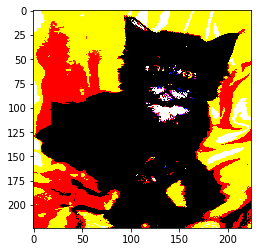

In [6]:
from keras.applications.vgg16 import preprocess_input

image_arr = img_to_array(raw_image)
image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))

# prepare the image for the VGG model
image_processed = preprocess_input(image)
plt.imshow(image_processed[0])

Let's see how it would be classified by a network now!

In [7]:
item = model.predict(image_processed)
labels = decode_predictions(item)
print(labels)

[[('n02123394', 'Persian_cat', 0.98178196), ('n02127052', 'lynx', 0.005701773), ('n02123045', 'tabby', 0.003358725), ('n03958227', 'plastic_bag', 0.002392506), ('n02123597', 'Siamese_cat', 0.002104175)]]


** Part II - CNN Activation ** <br />
Let's try to analize why our network decided to say that the picture is a (persian) cat. We can use <a href="https://raghakot.github.io/keras-vis/">keras-vis</a> module to inspect our vgg16 network.

Great example can be found in attached <a href="https://github.com/raghakot/keras-vis/blob/master/examples/vggnet/activation_maximization.ipynb">keras vis notebooks </a>

In [8]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Let's have a look how VGG16 "imagines" Persian cats to look like. We can expore the activation for "Persian cat" class. According to <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">this document</a>, Persian cat's ID is 283. We therefore explore what activate's the neuron responsible for class no. 283. 

For that, we use <a href="https://raghakot.github.io/keras-vis/vis.visualization/#visualize_activation">visualize_activation</a> from Keras API. This function will iteratively try to generate the input that will maximize the output of the given layer -> in our case we will be checking which input will maximize the output of a neuron that maximizes the "Persian cat" class.

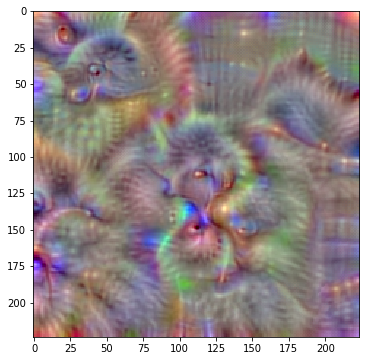

In [9]:
from vis.visualization import visualize_activation

CLASS_ID=283

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID)
plt.imshow(img)

Let's do a couple more iterations on activation function

Iteration: 1, named_losses: [('ActivationMax Loss', 0.07166153),
 ('L-6.0 Norm Loss', 0.063258596),
 ('TV(2.0) Loss', 6446.162)], overall loss: 6446.296875
Iteration: 2, named_losses: [('ActivationMax Loss', 0.0660325),
 ('L-6.0 Norm Loss', 0.0626861),
 ('TV(2.0) Loss', 3413.319)], overall loss: 3413.44775390625
Iteration: 3, named_losses: [('ActivationMax Loss', 0.005702438),
 ('L-6.0 Norm Loss', 0.062349673),
 ('TV(2.0) Loss', 1870.9543)], overall loss: 1871.0223388671875
Iteration: 4, named_losses: [('ActivationMax Loss', -0.08206029),
 ('L-6.0 Norm Loss', 0.062132347),
 ('TV(2.0) Loss', 993.416)], overall loss: 993.3961181640625
Iteration: 5, named_losses: [('ActivationMax Loss', -0.2064631),
 ('L-6.0 Norm Loss', 0.06198954),
 ('TV(2.0) Loss', 485.58017)], overall loss: 485.4356994628906
Iteration: 6, named_losses: [('ActivationMax Loss', -0.59237516),
 ('L-6.0 Norm Loss', 0.061897185),
 ('TV(2.0) Loss', 203.38406)], overall loss: 202.8535919189453
Iteration: 7, named_losses: [('Ac

Iteration: 55, named_losses: [('ActivationMax Loss', -57.94806),
 ('L-6.0 Norm Loss', 0.061894346),
 ('TV(2.0) Loss', 31.34654)], overall loss: -26.53962516784668
Iteration: 56, named_losses: [('ActivationMax Loss', -56.112892),
 ('L-6.0 Norm Loss', 0.061898418),
 ('TV(2.0) Loss', 31.651243)], overall loss: -24.399751663208008
Iteration: 57, named_losses: [('ActivationMax Loss', -58.21055),
 ('L-6.0 Norm Loss', 0.061900746),
 ('TV(2.0) Loss', 32.333168)], overall loss: -25.815479278564453
Iteration: 58, named_losses: [('ActivationMax Loss', -57.942776),
 ('L-6.0 Norm Loss', 0.061903697),
 ('TV(2.0) Loss', 32.639965)], overall loss: -25.24090576171875
Iteration: 59, named_losses: [('ActivationMax Loss', -61.656273),
 ('L-6.0 Norm Loss', 0.06190592),
 ('TV(2.0) Loss', 33.438427)], overall loss: -28.155941009521484
Iteration: 60, named_losses: [('ActivationMax Loss', -61.2178),
 ('L-6.0 Norm Loss', 0.06190947),
 ('TV(2.0) Loss', 34.48989)], overall loss: -26.666000366210938
Iteration: 61,

Iteration: 109, named_losses: [('ActivationMax Loss', -88.597374),
 ('L-6.0 Norm Loss', 0.06207341),
 ('TV(2.0) Loss', 44.56439)], overall loss: -43.97091293334961
Iteration: 110, named_losses: [('ActivationMax Loss', -86.99868),
 ('L-6.0 Norm Loss', 0.06207564),
 ('TV(2.0) Loss', 44.36182)], overall loss: -42.57478713989258
Iteration: 111, named_losses: [('ActivationMax Loss', -88.1574),
 ('L-6.0 Norm Loss', 0.06208058),
 ('TV(2.0) Loss', 44.848392)], overall loss: -43.24692916870117
Iteration: 112, named_losses: [('ActivationMax Loss', -88.68264),
 ('L-6.0 Norm Loss', 0.06208245),
 ('TV(2.0) Loss', 45.983288)], overall loss: -42.637271881103516
Iteration: 113, named_losses: [('ActivationMax Loss', -89.55767),
 ('L-6.0 Norm Loss', 0.062086053),
 ('TV(2.0) Loss', 47.36552)], overall loss: -42.130062103271484
Iteration: 114, named_losses: [('ActivationMax Loss', -92.20602),
 ('L-6.0 Norm Loss', 0.062087756),
 ('TV(2.0) Loss', 47.060684)], overall loss: -45.08324432373047
Iteration: 115,

Iteration: 163, named_losses: [('ActivationMax Loss', -103.389694),
 ('L-6.0 Norm Loss', 0.062246125),
 ('TV(2.0) Loss', 50.383526)], overall loss: -52.94392013549805
Iteration: 164, named_losses: [('ActivationMax Loss', -104.28117),
 ('L-6.0 Norm Loss', 0.062249605),
 ('TV(2.0) Loss', 51.7546)], overall loss: -52.464324951171875
Iteration: 165, named_losses: [('ActivationMax Loss', -104.644165),
 ('L-6.0 Norm Loss', 0.06225249),
 ('TV(2.0) Loss', 51.685062)], overall loss: -52.896846771240234
Iteration: 166, named_losses: [('ActivationMax Loss', -101.07287),
 ('L-6.0 Norm Loss', 0.062256433),
 ('TV(2.0) Loss', 53.5723)], overall loss: -47.43831253051758
Iteration: 167, named_losses: [('ActivationMax Loss', -105.54905),
 ('L-6.0 Norm Loss', 0.062259376),
 ('TV(2.0) Loss', 52.139313)], overall loss: -53.34748077392578
Iteration: 168, named_losses: [('ActivationMax Loss', -101.80579),
 ('L-6.0 Norm Loss', 0.062262733),
 ('TV(2.0) Loss', 53.29057)], overall loss: -48.45296096801758
Iterat

Iteration: 217, named_losses: [('ActivationMax Loss', -109.63951),
 ('L-6.0 Norm Loss', 0.06241806),
 ('TV(2.0) Loss', 53.70637)], overall loss: -55.870723724365234
Iteration: 218, named_losses: [('ActivationMax Loss', -115.16063),
 ('L-6.0 Norm Loss', 0.06241912),
 ('TV(2.0) Loss', 55.17618)], overall loss: -59.92203140258789
Iteration: 219, named_losses: [('ActivationMax Loss', -108.625114),
 ('L-6.0 Norm Loss', 0.062423974),
 ('TV(2.0) Loss', 54.884216)], overall loss: -53.67847442626953
Iteration: 220, named_losses: [('ActivationMax Loss', -113.66293),
 ('L-6.0 Norm Loss', 0.06242597),
 ('TV(2.0) Loss', 55.18932)], overall loss: -58.411190032958984
Iteration: 221, named_losses: [('ActivationMax Loss', -113.07559),
 ('L-6.0 Norm Loss', 0.062429223),
 ('TV(2.0) Loss', 55.615353)], overall loss: -57.39780807495117
Iteration: 222, named_losses: [('ActivationMax Loss', -115.8073),
 ('L-6.0 Norm Loss', 0.062431477),
 ('TV(2.0) Loss', 56.41727)], overall loss: -59.32759475708008
Iteration

Iteration: 271, named_losses: [('ActivationMax Loss', -126.916115),
 ('L-6.0 Norm Loss', 0.0626027),
 ('TV(2.0) Loss', 60.515114)], overall loss: -66.3384017944336
Iteration: 272, named_losses: [('ActivationMax Loss', -128.9786),
 ('L-6.0 Norm Loss', 0.062604904),
 ('TV(2.0) Loss', 60.946106)], overall loss: -67.96989440917969
Iteration: 273, named_losses: [('ActivationMax Loss', -129.51013),
 ('L-6.0 Norm Loss', 0.062611505),
 ('TV(2.0) Loss', 61.159187)], overall loss: -68.28833770751953
Iteration: 274, named_losses: [('ActivationMax Loss', -128.6288),
 ('L-6.0 Norm Loss', 0.06261391),
 ('TV(2.0) Loss', 61.781124)], overall loss: -66.78506469726562
Iteration: 275, named_losses: [('ActivationMax Loss', -131.05745),
 ('L-6.0 Norm Loss', 0.06261886),
 ('TV(2.0) Loss', 61.45078)], overall loss: -69.54405212402344
Iteration: 276, named_losses: [('ActivationMax Loss', -128.94516),
 ('L-6.0 Norm Loss', 0.06262156),
 ('TV(2.0) Loss', 61.661427)], overall loss: -67.22111511230469
Iteration: 2

Iteration: 325, named_losses: [('ActivationMax Loss', -133.24257),
 ('L-6.0 Norm Loss', 0.06282151),
 ('TV(2.0) Loss', 65.770744)], overall loss: -67.40900421142578
Iteration: 326, named_losses: [('ActivationMax Loss', -141.80037),
 ('L-6.0 Norm Loss', 0.06282401),
 ('TV(2.0) Loss', 66.47796)], overall loss: -75.25959014892578
Iteration: 327, named_losses: [('ActivationMax Loss', -135.17303),
 ('L-6.0 Norm Loss', 0.06283021),
 ('TV(2.0) Loss', 65.03135)], overall loss: -70.07884979248047
Iteration: 328, named_losses: [('ActivationMax Loss', -144.00308),
 ('L-6.0 Norm Loss', 0.06283126),
 ('TV(2.0) Loss', 66.39418)], overall loss: -77.54606628417969
Iteration: 329, named_losses: [('ActivationMax Loss', -132.67337),
 ('L-6.0 Norm Loss', 0.06283731),
 ('TV(2.0) Loss', 65.24386)], overall loss: -67.3666763305664
Iteration: 330, named_losses: [('ActivationMax Loss', -144.66908),
 ('L-6.0 Norm Loss', 0.06283994),
 ('TV(2.0) Loss', 66.46981)], overall loss: -78.13643646240234
Iteration: 331, 

Iteration: 379, named_losses: [('ActivationMax Loss', -147.64304),
 ('L-6.0 Norm Loss', 0.0630514),
 ('TV(2.0) Loss', 68.2705)], overall loss: -79.30948638916016
Iteration: 380, named_losses: [('ActivationMax Loss', -146.90681),
 ('L-6.0 Norm Loss', 0.06305562),
 ('TV(2.0) Loss', 68.21233)], overall loss: -78.63143157958984
Iteration: 381, named_losses: [('ActivationMax Loss', -148.4722),
 ('L-6.0 Norm Loss', 0.0630598),
 ('TV(2.0) Loss', 68.19874)], overall loss: -80.21039581298828
Iteration: 382, named_losses: [('ActivationMax Loss', -146.11147),
 ('L-6.0 Norm Loss', 0.06306535),
 ('TV(2.0) Loss', 68.691315)], overall loss: -77.35708618164062
Iteration: 383, named_losses: [('ActivationMax Loss', -149.90778),
 ('L-6.0 Norm Loss', 0.06307139),
 ('TV(2.0) Loss', 68.765526)], overall loss: -81.07918548583984
Iteration: 384, named_losses: [('ActivationMax Loss', -146.87314),
 ('L-6.0 Norm Loss', 0.06307514),
 ('TV(2.0) Loss', 68.82569)], overall loss: -77.98436737060547
Iteration: 385, na

Iteration: 433, named_losses: [('ActivationMax Loss', -154.46407),
 ('L-6.0 Norm Loss', 0.06330948),
 ('TV(2.0) Loss', 71.78716)], overall loss: -82.61359405517578
Iteration: 434, named_losses: [('ActivationMax Loss', -147.91893),
 ('L-6.0 Norm Loss', 0.063316405),
 ('TV(2.0) Loss', 70.87989)], overall loss: -76.97571563720703
Iteration: 435, named_losses: [('ActivationMax Loss', -154.92891),
 ('L-6.0 Norm Loss', 0.06331947),
 ('TV(2.0) Loss', 71.95753)], overall loss: -82.9080581665039
Iteration: 436, named_losses: [('ActivationMax Loss', -149.68213),
 ('L-6.0 Norm Loss', 0.0633256),
 ('TV(2.0) Loss', 72.09413)], overall loss: -77.52467346191406
Iteration: 437, named_losses: [('ActivationMax Loss', -156.15591),
 ('L-6.0 Norm Loss', 0.06333086),
 ('TV(2.0) Loss', 72.4771)], overall loss: -83.61549377441406
Iteration: 438, named_losses: [('ActivationMax Loss', -149.31874),
 ('L-6.0 Norm Loss', 0.06333645),
 ('TV(2.0) Loss', 71.42929)], overall loss: -77.82611083984375
Iteration: 439, na

Iteration: 487, named_losses: [('ActivationMax Loss', -157.73021),
 ('L-6.0 Norm Loss', 0.06360727),
 ('TV(2.0) Loss', 73.194374)], overall loss: -84.47222137451172
Iteration: 488, named_losses: [('ActivationMax Loss', -152.88055),
 ('L-6.0 Norm Loss', 0.0636163),
 ('TV(2.0) Loss', 73.56027)], overall loss: -79.25666809082031
Iteration: 489, named_losses: [('ActivationMax Loss', -160.29314),
 ('L-6.0 Norm Loss', 0.063619986),
 ('TV(2.0) Loss', 73.43777)], overall loss: -86.79175567626953
Iteration: 490, named_losses: [('ActivationMax Loss', -149.72516),
 ('L-6.0 Norm Loss', 0.06362924),
 ('TV(2.0) Loss', 73.715904)], overall loss: -75.94562530517578
Iteration: 491, named_losses: [('ActivationMax Loss', -162.05376),
 ('L-6.0 Norm Loss', 0.06362967),
 ('TV(2.0) Loss', 73.86601)], overall loss: -88.12411499023438
Iteration: 492, named_losses: [('ActivationMax Loss', -148.98256),
 ('L-6.0 Norm Loss', 0.063639656),
 ('TV(2.0) Loss', 72.916985)], overall loss: -76.0019302368164
Iteration: 49

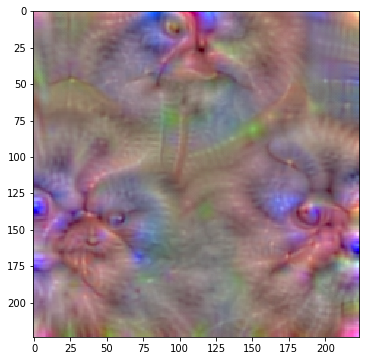

In [10]:
img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID, max_iter=500, verbose=True)
plt.imshow(img)

Following <a href="https://raghakot.github.io/keras-vis/visualizations/activation_maximization/">the hints</a> of the library's author, let's try to introduce Jitter.

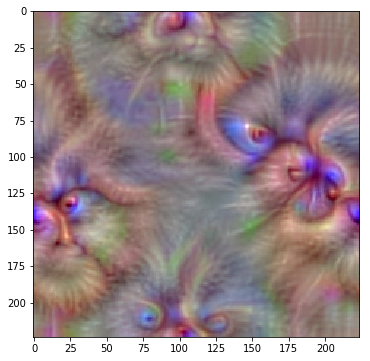

In [11]:
from vis.input_modifiers import Jitter


# Jitter 16 pixels along all dimensions to during the optimization process.
img = visualize_activation(model, layer_idx, filter_indices=CLASS_ID, max_iter=500, input_modifiers=[Jitter(16)])
plt.imshow(img)

In the end, let's try to plot heatmap of our CNN and see which part of image triggered it to believe that this is a persian cat. 

For that, we will use the <a href="https://raghakot.github.io/keras-vis/vis.visualization/#visualize_cam">visualize_cam</a> function from Keras API. 

Intuition + papre reference for how it works <a href="https://jacobgil.github.io/deeplearning/class-activation-maps">can be found here</a>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


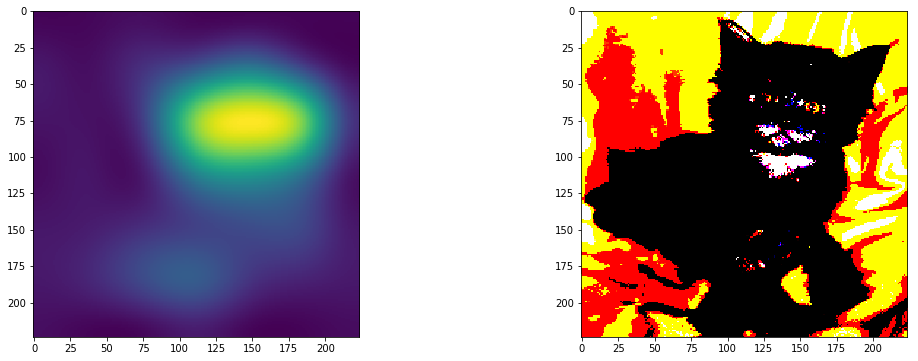

In [12]:
from vis.visualization import visualize_cam

img = visualize_cam(model, layer_idx, filter_indices=CLASS_ID, seed_input=image_processed)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(image_processed[0])

**Excercise 1.** Try to upload your own picture and see how would it be recognized by the network! You can use <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">Imagenet data</a> to see what classes can you expect!



**Excercise 2.** Pick <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">Imagenet class</a> other than cat. Try to see what activates neuron responsible for it.

